In [1]:
import numpy as np
import pandas as  pd
import os
from imageio import imread
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
cwd = os.getcwd()
print("Current Folder Location Is : ", cwd)

Current Folder Location Is :  /Users/mejbahahammad/Documents/My_Prectics/TensorFlow


In [3]:
paths = {"img_dataset/celebs/Arnold_Schwarzenegger/",
        "img_dataset/celebs/George_W_Bush/",
        "img_dataset/celebs/Junichiro_Koizumi/",
        "img_dataset/celebs/Tony_Blair/",
        "img_dataset/celebs/Vladimir_Putin/"}

In [4]:
imgsize = [64, 64]
use_gray = 1
data_name =  "Custom_dataset"

In [5]:
print("Your Dataset Shouyld Be At: \n")
for i, path in enumerate(paths):
    print("[%d/%d] %s/%s"%(i, len(paths), cwd, path))

Your Dataset Shouyld Be At: 

[0/5] /Users/mejbahahammad/Documents/My_Prectics/TensorFlow/img_dataset/celebs/Vladimir_Putin/
[1/5] /Users/mejbahahammad/Documents/My_Prectics/TensorFlow/img_dataset/celebs/Arnold_Schwarzenegger/
[2/5] /Users/mejbahahammad/Documents/My_Prectics/TensorFlow/img_dataset/celebs/Junichiro_Koizumi/
[3/5] /Users/mejbahahammad/Documents/My_Prectics/TensorFlow/img_dataset/celebs/George_W_Bush/
[4/5] /Users/mejbahahammad/Documents/My_Prectics/TensorFlow/img_dataset/celebs/Tony_Blair/


In [6]:
print("Data Will Be Saved In: \n")
print(cwd + "/data/Custom_Data/"+ data_name+ ".npz")

Data Will Be Saved In: 

/Users/mejbahahammad/Documents/My_Prectics/TensorFlow/data/Custom_Data/Custom_dataset.npz


### RGB to GRAY convertion

In [7]:
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])
    else:
        return rgb

#### Load Images

In [8]:
nclass = len(paths)
valid_exts = ['.jpg', '.gif', 'png', '.tga','jpeg']
imgcnt = 0

In [9]:
for i, relpath in zip(range(nclass), paths):
    path = cwd + "/"+relpath
    flist = os.listdir(path)
    
    for f in flist:
        if os.path.splitext(f)[1].lower() not in valid_exts:
            continue
            
        fullpath = os.path.join(path, f)
        currimg = imread(fullpath)
        
        # Convert Images RGB to GrayScale
        
        if use_gray:
            grayimg = rgb2gray(currimg)
        else:
            grayimg = currimg
            
            
        # Reshaping
        
        graysmall = np.array(Image.fromarray(grayimg).resize([imgsize[0], imgsize[1]]))/255.
        
        #graysmall = Image.fromarray(grayimg).resize(grayimg, [imgsize[0], imgsize[1]])/255.
        grayvec = np.reshape(graysmall, (1, -1))
        
        # Save Images
        
        curr_label = np.eye(nclass, nclass)[i:i+1, :]
        
        if imgcnt is 0:
            totalimg = grayvec
            totallabel = curr_label
        else:
            
            totalimg = np.concatenate((totalimg, grayvec), axis = 0)
            totallabel = np.concatenate((totallabel, curr_label), axis = 0)
            
            
        imgcnt = imgcnt + 1
        

In [10]:
print(" Total Loaded Images are: {}".format(imgcnt))

 Total Loaded Images are: 825


### Divide Datasets Into Training and Testing Datasets

In [11]:
def print_shape(string, x):
    print("Shape of %s is %s "%(string, x.shape,))

In [12]:
randidx = np.random.randint(imgcnt, size = imgcnt)
trainidx = randidx[0:int(imgcnt/5)]
testidx = randidx[int(3*imgcnt/5): imgcnt]

trainimg = totalimg[trainidx, :]
trainlabel = totallabel[trainidx, :]

testimg = totalimg[testidx,:]
testlabel = totallabel[testidx, :]

In [13]:
savepath = cwd + '/data/'+data_name + ".npz"
np.savez(savepath, trainimg = trainimg, trainlabel = trainlabel,
        testimg = testimg, testlabel = testlabel, imgsize = imgsize, use_gray = use_gray)

In [14]:
print("The File was save to : {}".format(savepath))

The File was save to : /Users/mejbahahammad/Documents/My_Prectics/TensorFlow/data/Custom_dataset.npz


### Load the datasets

In [15]:
cwd = os.getcwd()
load_path = cwd + '/data/'+ data_name+ '.npz'
l = np.load(load_path)

In [16]:
l.files

['trainimg', 'trainlabel', 'testimg', 'testlabel', 'imgsize', 'use_gray']

In [17]:
train_loaded = l['trainimg']
test_loaded = l['testimg']

trainlabel_loaded = l['trainlabel']
testlabel_loaded = l['testlabel']

In [18]:
print("Training Image loaded is : {} ".format(train_loaded.shape[0]))
print("Test Images Loaded is : {} ".format(test_loaded.shape[0]))

Training Image loaded is : 165 
Test Images Loaded is : 330 


In [19]:
ntrain_loaded = train_loaded.shape[0]
batch_size = 10
randidx = np.random.randint(ntrain_loaded, size = batch_size)

/opt/anaconda3/envs/DataScience/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


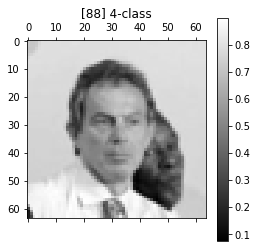

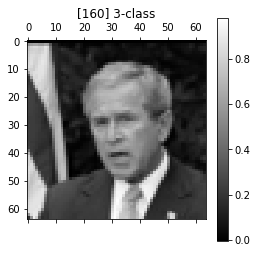

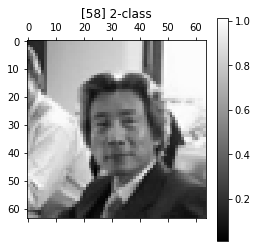

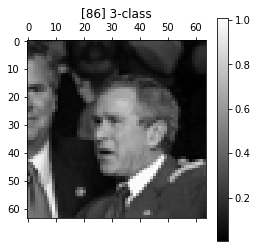

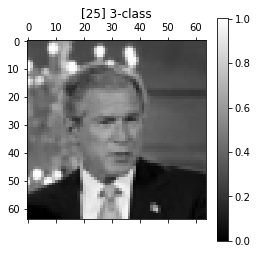

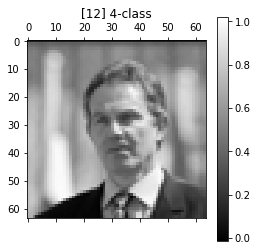

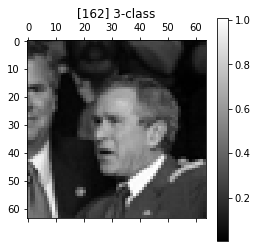

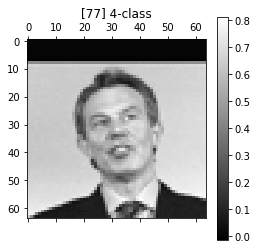

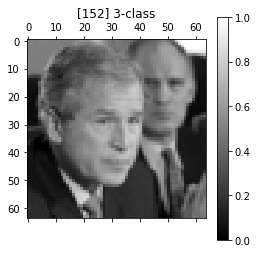

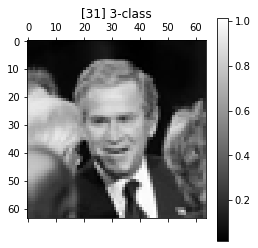

In [21]:
for i in randidx:
    currimg = np.reshape(train_loaded[i, :], (imgsize[0], -1))
    currlabel_onhot = trainlabel_loaded[i, :]
    currlabel = np.argmax(currlabel_onhot)
    
    
    if use_gray:
        currimg = np.reshape(trainimg[i, :], (imgsize[0], -1))
        plt.matshow(currimg, cmap = plt.get_cmap('gray'))
        plt.colorbar()
        
    else:
        currimg = np.reshape(training[i, :], imgsize[0], (imgsize[1], 3))
        plt.imshow(currimg)
        
    title_string = "[%d] %d-class"%(i, currlabel)
    plt.title(title_string)
    plt.tight_layout()
    plt.show()